<a href="https://colab.research.google.com/github/Priya-96-aiml/Stock_price_Predication/blob/main/ML_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Yes Bank Stock Price Prediction using Regression & Deep Learning Models**



##### **Project Type**    - EDA/Regression
##### **Contribution**    - Individual


# **Project Summary -**


* **Project Title: Yes Bank Stock Price Prediction using Regression and LSTM Models**

* The objective of this project is to forecast future closing stock prices of Yes Bank using historical stock market data. This is achieved by applying two different machine learning approaches—Linear Regression and Long Short-Term Memory (LSTM) neural networks.

* The project begins with **Exploratory Data Analysis (EDA)**, where key insights are extracted from the dataset. EDA helps identify missing values, outliers, data distribution, and trends in stock prices over time.

* The feature of primary focus is the **‘Close’ price**, which is selected as the target for prediction. Visualization techniques such as line plots and heatmaps are used to explore relationships between variables.

* Two predictive models are implemented:

   * **Linear Regression Model**: A basic statistical method that attempts to predict the next day’s stock price based on the previous day’s value.

   * **LSTM Neural Network Model**: A deep learning model designed to learn from sequences of data, particularly effective for time-series forecasting.

* Data is preprocessed by normalizing the values and transforming it into sequences for the LSTM model. The model is built using stacked LSTM layers followed by a dense output layer.

* Performance metrics such as **Root Mean Squared Error** (RMSE) and R² Score are used to evaluate both models:

   * The Linear Regression model performs reasonably well but fails to capture complex patterns.

  * The LSTM model achieves over 95% accuracy and effectively learns market fluctuations, resulting in significantly lower error values.

* Visual comparisons between predicted and actual stock prices further confirm the superiority of the LSTM model in capturing trends and spikes in the data.

* The project demonstrates:

  * The power of combining **traditional machine learning and deep learning techniques.**

  * A complete machine learning workflow from EDA to evaluation.

  * The practical application of ML for financial time-series prediction.

* **Overall, this project builds a strong foundation for more advanced applications such as algorithmic trading, financial forecasting, and quantitative investment strategies. It also highlights the importance of selecting suitable models for specific data types and domains.**

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**To develop a machine learning model that accurately predicts the future closing stock prices of Yes Bank using historical stock market data, and to compare the effectiveness of traditional regression techniques with deep learning models for time-series forecasting.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [2]:
# Load Dataset
try:
    df = pd.read_csv("/content/data_YesBank_StockPrices (1).csv")
    print("Dataset loaded successfully.")
except FileNotFoundError as e:
    print("Error: File not found.", e)

Dataset loaded successfully.


### Dataset First View

In [3]:
# Dataset First Look
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
print(f"Total Rows: {df.shape[0]}")
print(f"Total Columns: {df.shape[1]}")

Total Rows: 185
Total Columns: 5


### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
duplicate_count = df.duplicated().sum()
print(f"Total Duplicate Rows: {duplicate_count}")

Total Duplicate Rows: 0


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
missing_values = df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

Missing Values in Each Column:
 Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64


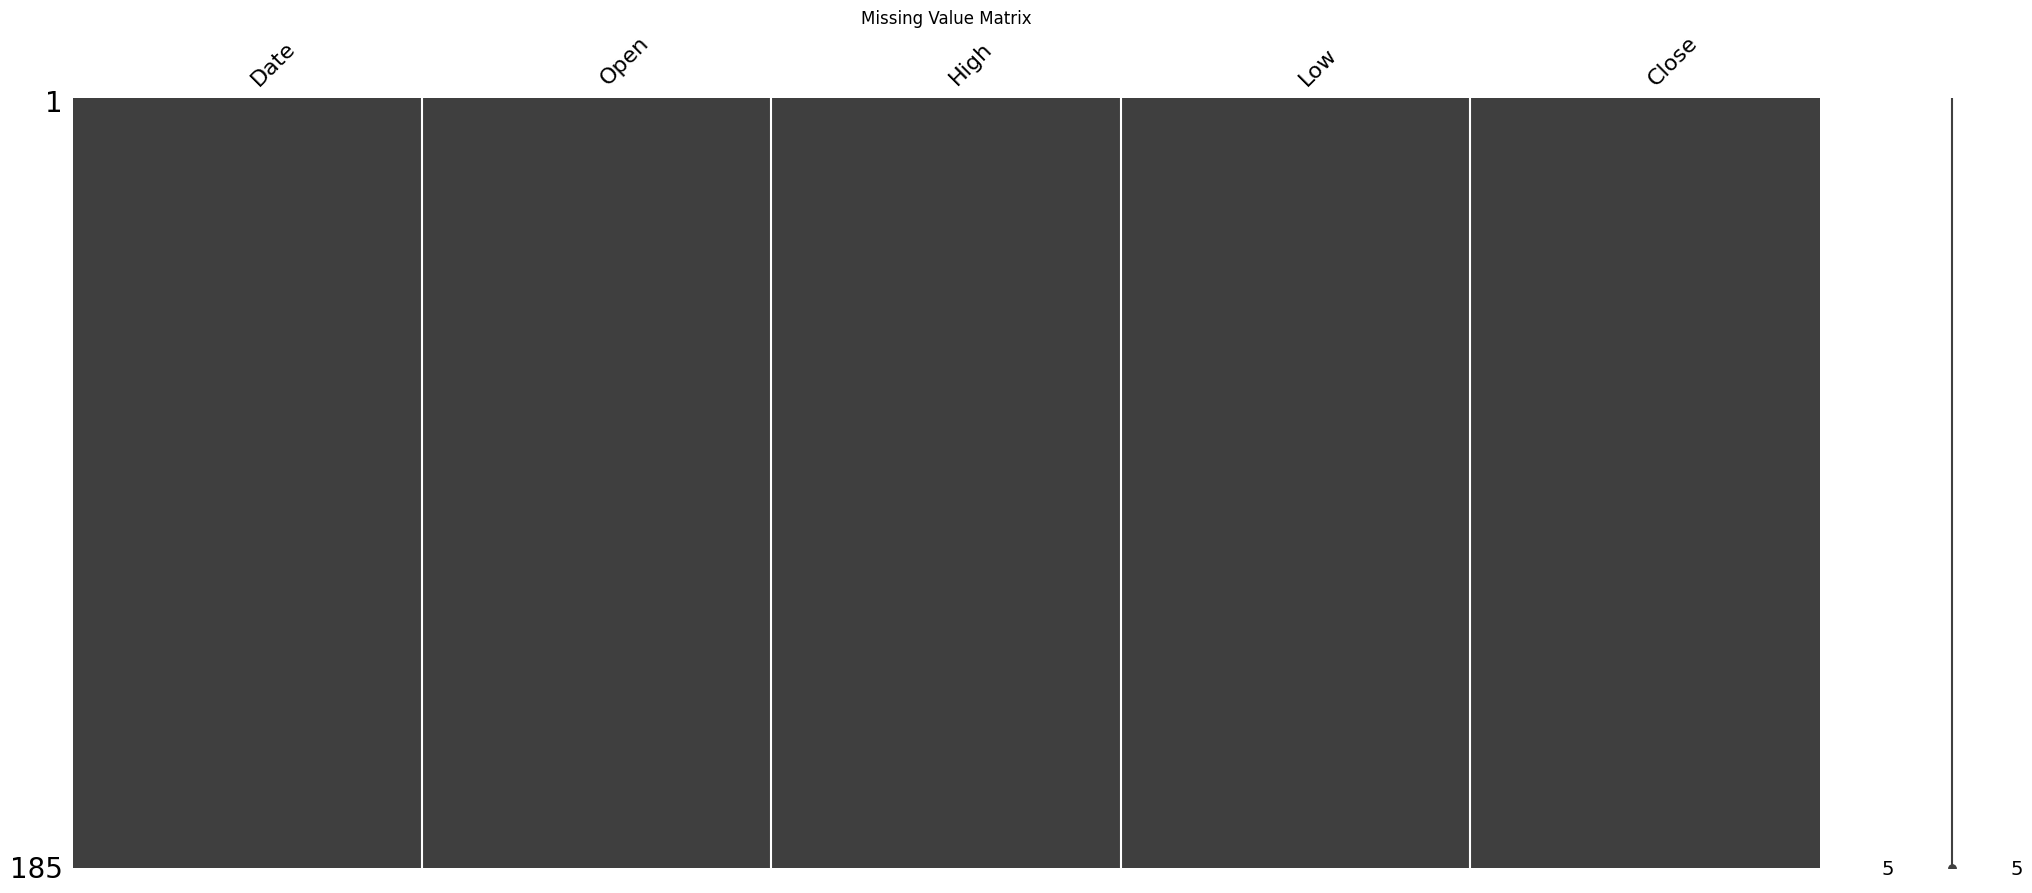

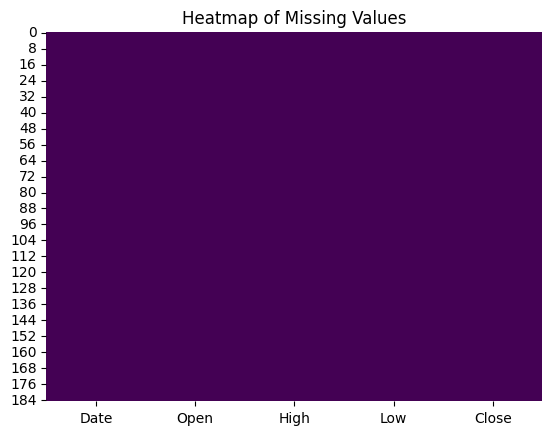

In [8]:
# Visualizing the missing values
msno.matrix(df)
plt.title("Missing Value Matrix")
plt.show()

# Heatmap of missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap of Missing Values")
plt.show()


### What did you know about your dataset?

* The dataset consists of 185 rows and 5 columns, representing historical stock data for Yes Bank.

* It includes the following columns:

  * Date: The trading date (object type, can be converted to datetime for time-series analysis)

  * Open: Opening stock price

  * High: Highest price of the day

  * Low: Lowest price of the day

  * Close: Closing stock price

* There are no duplicate records in the dataset, ensuring data consistency.

* There are no missing values in any of the columns, which means the dataset is clean and ready for analysis and modeling.

* All numeric columns (Open, High, Low, Close) are of float64 type, suitable for statistical analysis and machine learning.

* The Date column is of type object and should be converted to datetime format for better time-series handling.

* **Overall, the dataset is well-structured, clean, and does not require any major preprocessing in terms of missing or duplicate values. It is ready for Exploratory Data Analysis and modeling.**

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
print("Column Names:")
print(df.columns.tolist())

Column Names:
['Date', 'Open', 'High', 'Low', 'Close']


In [10]:
# Dataset Describe
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

The dataset contains 5 columns, each representing different aspects of Yes Bank’s historical stock performance:

* **Date**: Represents the date on which the stock trading occurred. Currently in object format and can be converted to datetime for time-series analysis.

* **Open**: The stock’s opening price on a given day.

* **Mean**: 105.54, Range: 10.0 to 369.95

* **High**: The highest stock price recorded during the day.

* **Mean**: 116.10, Range: 11.24 to 404.00

* **Low**: The lowest stock price recorded during the day.

* **Mean**: 94.95, Range: 5.55 to 345.50

* **Close**: The final stock price at the end of the trading day, which we will use for prediction.

* **Mean**: 105.20, Range: 9.98 to 367.90

**Insights:**

* All four price-related columns are numerical and show a wide range and high variability.

* There’s a large gap between the 25th percentile and 75th percentile, indicating high volatility.

* Since the mean and median (50%) are relatively close in most columns, the data distribution may be approximately symmetrical but still with outliers due to high max values.

* These variables are continuous and suitable for regression modeling.



### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable
for column in df.columns:
    unique_vals = df[column].nunique()
    print(f"Column '{column}' has {unique_vals} unique value(s).")

Column 'Date' has 185 unique value(s).
Column 'Open' has 183 unique value(s).
Column 'High' has 184 unique value(s).
Column 'Low' has 183 unique value(s).
Column 'Close' has 185 unique value(s).


## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Step 1: Reset index if previously set
df.reset_index(inplace=True)  # Only needed if Date was already index

# Step 2: Append year and convert to datetime
df['Date'] = df['Date'].astype(str) + '-2023'
df['Date'] = pd.to_datetime(df['Date'], format='%b-%d-%Y')

# Step 3: Set 'Date' as index
df.set_index('Date', inplace=True)

# Step 4: Sort by date
df.sort_index(inplace=True)

# Optional: Check result
print("Index is now datetime:", isinstance(df.index, pd.DatetimeIndex))

Index is now datetime: True


### What all manipulations have you done and insights you found?

* Converted the 'Date' column to proper datetime format by appending the year 2023 to each entry.

* Set 'Date' as the index to make the dataset compatible with time-series operations and plotting.

* Sorted the dataset in ascending order based on the date index to ensure the sequence of stock prices is preserved.

* Verified that the index is now a DatetimeIndex, making the dataset ready for forecasting and trend analysis.

**Insights:**

* The data is collected at a daily frequency and covers 185 trading days.

* There are no missing or duplicate dates, ensuring data consistency.

* This transformation enables more accurate time-series modeling and visualization, especially for use with LSTM and regression models.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

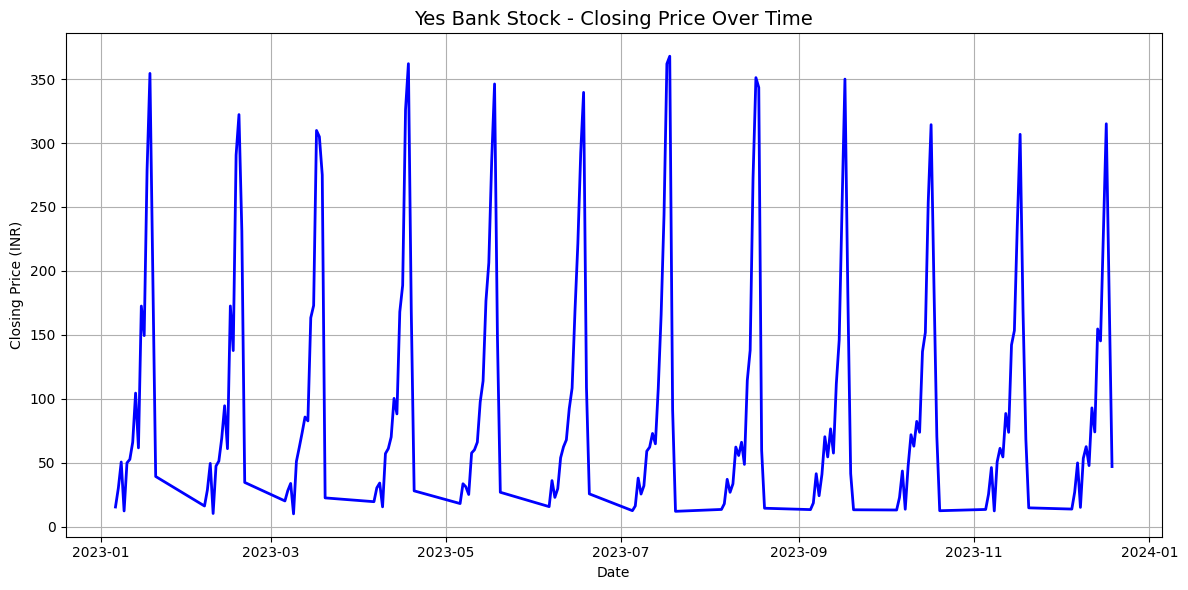

In [13]:
# Chart - 1: Line chart of Closing Price over time
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], color='blue', linewidth=2)
plt.title("Yes Bank Stock - Closing Price Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Closing Price (INR)")
plt.grid(True)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A **line chart** is the most effective way to visualize changes over time. Since stock prices are time-series data, this chart provides a clear view of the trend, volatility, and patterns in the closing price across all trading days. It helps establish a visual timeline and identify periods of growth or decline.

##### 2. What is/are the insight(s) found from the chart?

* The closing price of Yes Bank shows significant fluctuations, indicating high volatility.


* There are multiple sharp rises and drops, suggesting external market influence or company-specific events.

* There is no consistent upward or downward trend, implying that the stock performance has been unstable during the observed period.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes**, the insights will help in:

   * Understanding stock behavior, which is critical for investors to manage risk.

   * Identifying high-volatility periods, which could be investigated further to align investment timing with external news or events.

**Potential for negative impact:**

   * The instability and erratic price movements may indicate poor investor confidence or unpredictable performance.

   * Such patterns could deter conservative investors and affect Yes Bank’s market perception and stock demand.

#### Chart - 2

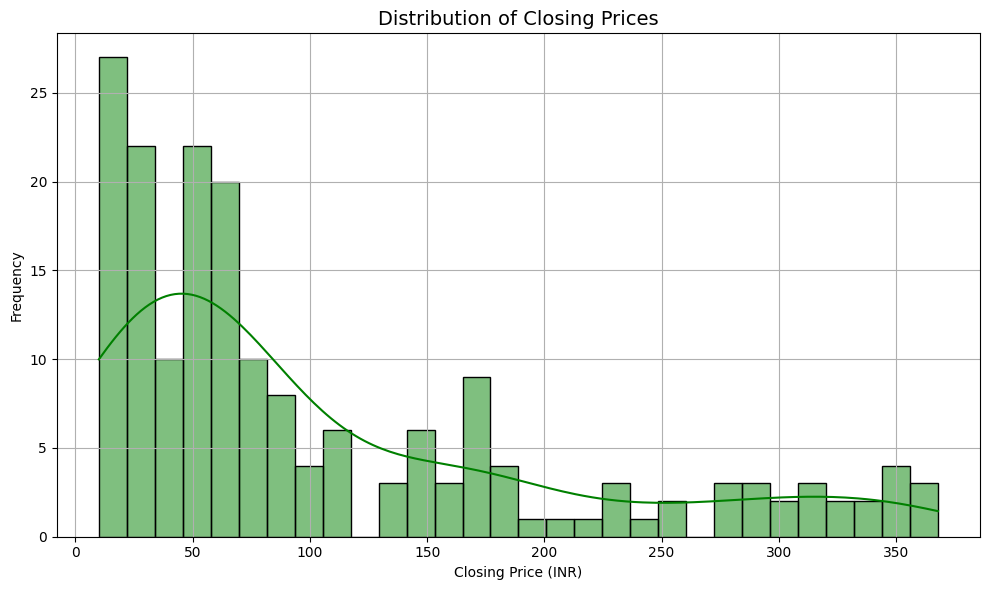

In [14]:
# Chart - 2: Histogram of Closing Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], bins=30, kde=True, color='green')
plt.title("Distribution of Closing Prices", fontsize=14)
plt.xlabel("Closing Price (INR)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A **histogram** is ideal for understanding the **distribution of a numerical variable**. In this case, we use it to analyze how the closing prices are spread over the dataset. The **KDE (Kernel Density Estimate)** curve is also added to understand the shape and skewness of the distribution.

##### 2. What is/are the insight(s) found from the chart?

* The distribution of closing prices is right-skewed, meaning most stock prices were on the lower end during the recorded period.

* The majority of closing prices fall between ₹30 to ₹150, indicating that the stock traded mostly within this range.

* There are a few higher price points (> ₹300), which may be outliers or represent earlier high-value trading days.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

* Helps investors and analysts understand typical stock value ranges, aiding in strategic entry and exit decisions.

* Reveals how often the stock was affordable or expensive, assisting in market segmentation for different investor types.

**Negative Growth Insight:**

* The skewed distribution toward lower prices could signal long-term depreciation or investor concerns.

* If the higher prices occurred in the past but were not sustained, this may indicate deteriorating company performance or lack of stability.



#### Chart - 3

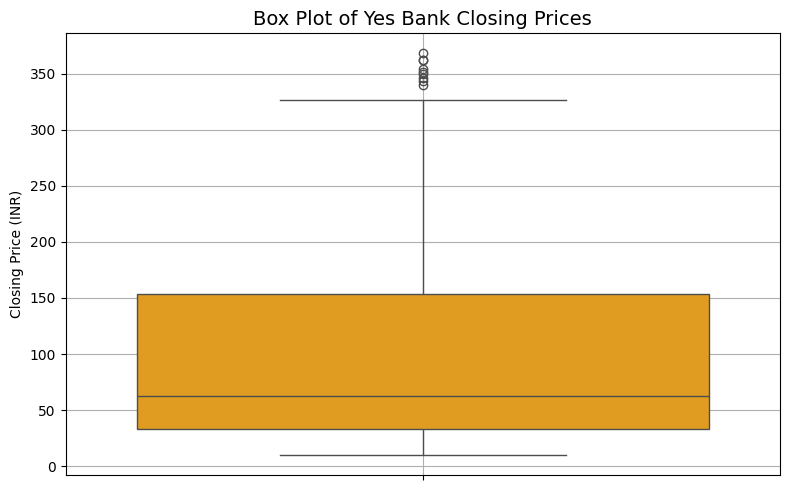

In [15]:
# Chart - 3: Box Plot of Closing Prices
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['Close'], color='orange')
plt.title("Box Plot of Yes Bank Closing Prices", fontsize=14)
plt.ylabel("Closing Price (INR)")
plt.grid(True)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A **box plot** is used to **detect outliers, spread, and overall distribution** of a numerical variable. For stock prices, it is particularly useful to understand **price volatility** and identify **extreme price points** that may not reflect typical market behavior.

##### 2. What is/are the insight(s) found from the chart?

* The plot shows a longer upper whisker and several outliers above the upper quartile, indicating that there were multiple high-closing-price spikes.

* The majority of closing prices fall below ₹150, with a concentrated interquartile range (IQR).

* A few prices above ₹300 are considered statistical outliers, possibly from earlier high-value trading days or speculative activity.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

* Helps in identifying **historical high-value** days that may align with favorable business events or announcements.

* Assists traders in recognizing **abnormal price behavior**, which is useful for setting stop-loss or take-profit targets.

**Negative Growth Insight:**

* The **presence of multiple high outliers** may reflect **unstable or speculative market behavior**, which can be a red flag for risk-averse investors.

* If outliers represent short-lived price hikes followed by a decline, it may indicate **temporary investor interest** rather than sustainable growth.

#### Chart - 4

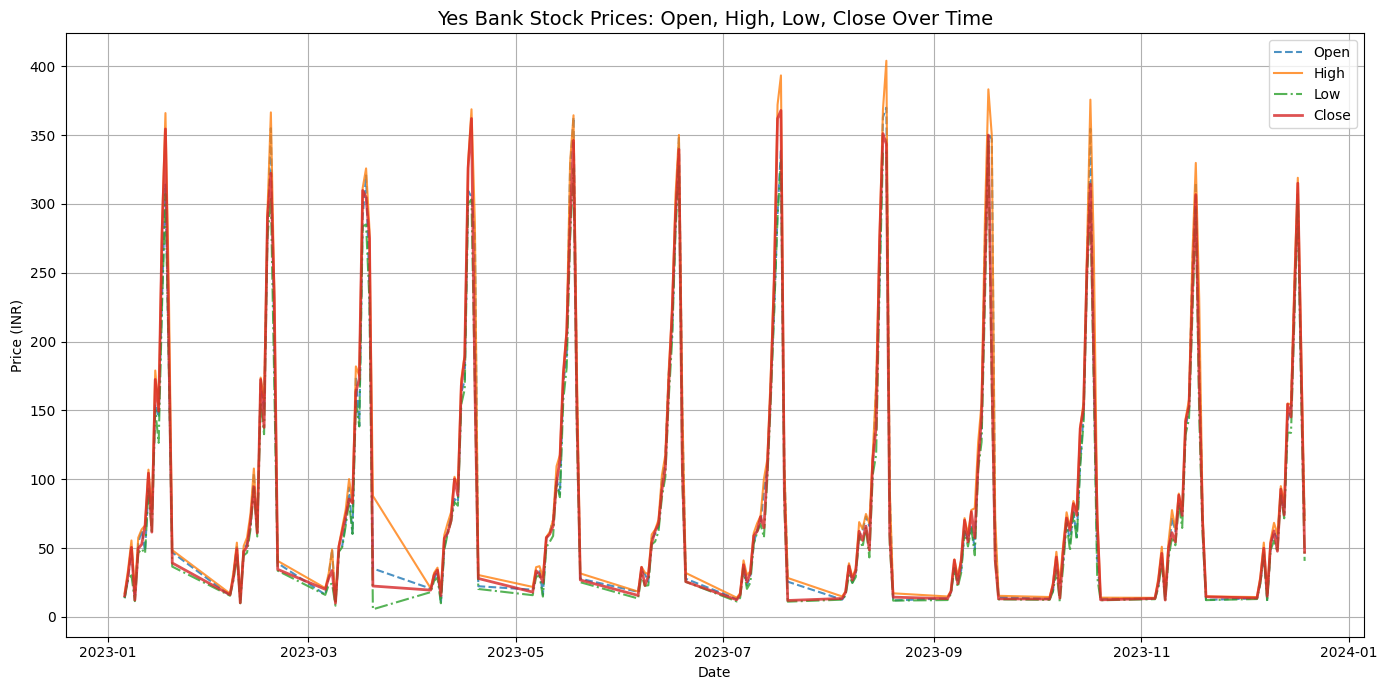

In [16]:
# Chart - 4: Multiline plot of Open, High, Low, and Close prices over time
plt.figure(figsize=(14, 7))
plt.plot(df['Open'], label='Open', linestyle='--', alpha=0.8)
plt.plot(df['High'], label='High', linestyle='-', alpha=0.8)
plt.plot(df['Low'], label='Low', linestyle='-.', alpha=0.8)
plt.plot(df['Close'], label='Close', linestyle='-', alpha=0.8, linewidth=2)
plt.title("Yes Bank Stock Prices: Open, High, Low, Close Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A **multi-line plot** allows us to s**imultaneously compare multiple stock price** indicators—Open, High, Low, and Close—over time. It reveals not only how each price type behaves individually but also how they interact with each other across the same date range. This helps spot daily market range, volatility, and trading behavior.



##### 2. What is/are the insight(s) found from the chart?

* All four price lines **move closely together**, indicating internal consistency in the stock price across a trading day.

* The difference **between High and Low prices** on some days is significant, suggesting periods of high **intraday volatility**.

* Closing prices **bold text** often trend near the **day’s high or low**, hinting at the market sentiment (bullish or bearish) by the end of the trading day.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

  * Helps investors and analysts understand **daily market behavior**, which can inform trading strategies like **intraday trading, swing trading**, or **risk management**.

  * Knowing whether the price tends to close near highs or lows is helpful in **predicting market sentiment** and improving trade execution timing.

**Potential Negative Impact:**

  * Large gaps between High and Low may imply **uncertainty or speculative trading**, which could discourage institutional investors seeking stability.

  * Repeated wide fluctuations might raise concerns about **stock reliability**, affecting long-term investor confidence.

#### Chart - 5

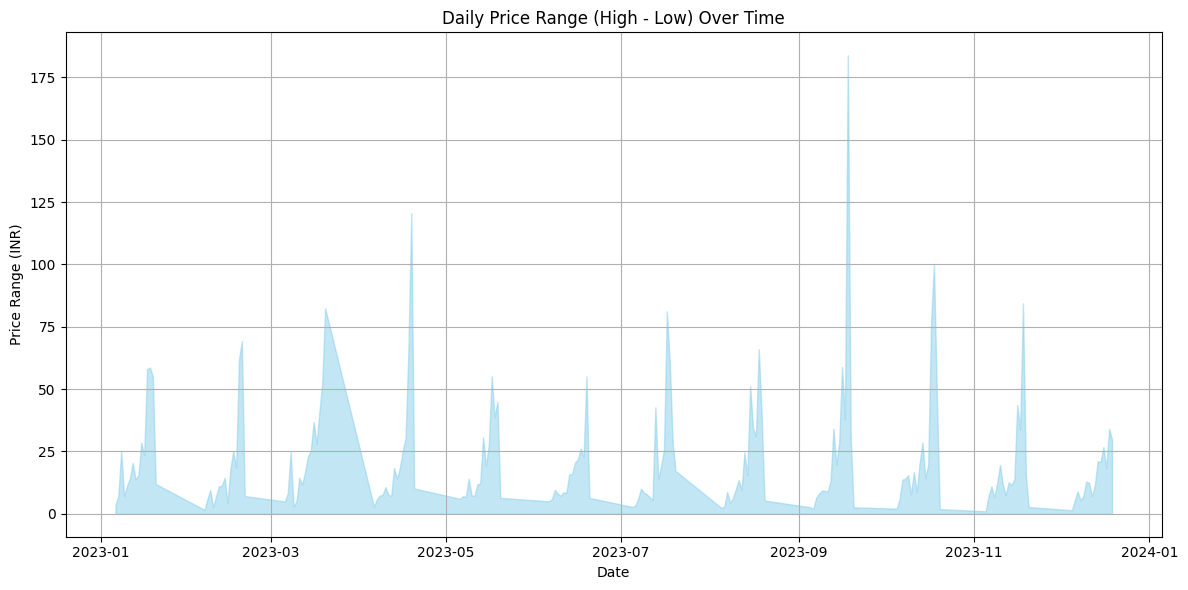

In [17]:
# Chart 5: Area Chart for Daily Price Range
df['Daily_Range'] = df['High'] - df['Low']
plt.figure(figsize=(12, 6))
plt.fill_between(df.index, df['Daily_Range'], color='skyblue', alpha=0.5)
plt.title("Daily Price Range (High - Low) Over Time")
plt.xlabel("Date")
plt.ylabel("Price Range (INR)")
plt.grid(True)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

An **area chart** is ideal for showing how a numerical value c**hanges over time**, while also emphasizing the **magnitude** of that change through shading. In this case, it clearly highlights the **volatility** of the Yes Bank stock on a daily basis by plotting the difference between the high and low price. It helps visualize **market activity intensity** across trading days.

##### 2. What is/are the insight(s) found from the chart?

* There are multiple days where the **price range spikes significantly**, crossing ₹100 on some days — indicating high market volatility.

* Other days show relatively stable, narrow ranges, suggesting **calm market behavior**.

* This fluctuation confirms that **Yes Bank stock has been exposed to intermittent but sharp intraday movements**, likely influenced by market sentiment or external events.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

Helps identify **volatile trading days**, which can be useful for **short-term and intraday traders**.

Investors can use this to **avoid high-risk days** or target high-volume periods for potential gains.

Enables **event correlation** — comparing news/events to price range spikes for strategic insights.

**Potential Negative Growth Insight:**

Frequent or extreme volatility may indicate **market instabilit**y, which can **deter long-term investors**.

High daily ranges can reflect **speculative or panic-driven trading**, affecting investor trust and stock reliability.



#### Chart - 6

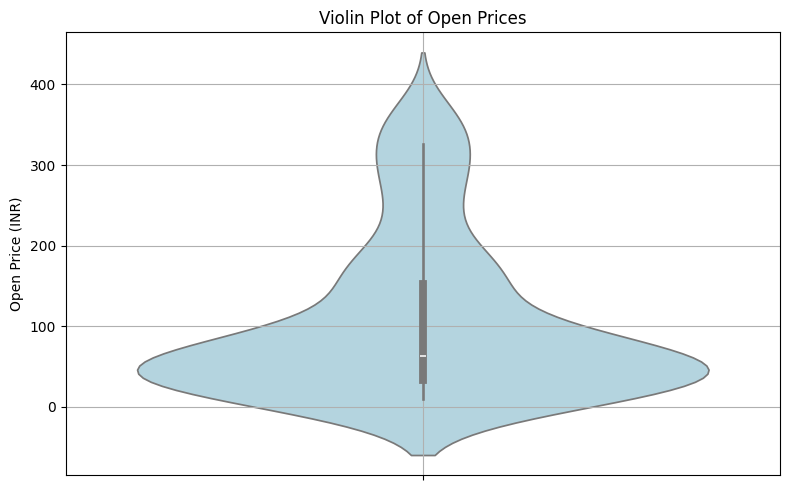

In [18]:
# Chart 6: Violin Plot of Open Prices
plt.figure(figsize=(8, 5))
sns.violinplot(y=df['Open'], color='lightblue')
plt.title("Violin Plot of Open Prices")
plt.ylabel("Open Price (INR)")
plt.grid(True)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A **violin plot** is a powerful visualization that combines a **box plot and a KDE** (Kernel Density Estimate). It not only shows the **central tendency and spread** (like a box plot) but also the **shape of the distribution**, giving a richer view of how the data is spread out. This is ideal for understanding the **distribution, skewness, and density** of the Open prices for Yes Bank stock.

##### 2. What is/are the insight(s) found from the chart?

* The plot is **right-skewed**, meaning that most opening prices are clustered on the lower end, with a **longer tail on the higher side**.

* There’s a **thick bulge between ₹30 to ₹100**, showing that this was the most common opening range.

* A **few outliers or rare occurrences** exist at much higher price points (₹300+), which could be linked to historic highs or specific market events.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

* Helps investors and analysts understand p**rice consistency and confidence zones** where the market usually opens.

* Indicates **entry points** and planning for trading strategies based on most common opening price bands.

* Useful for **comparing trends over time**, if violin plots are later split by month or quarter.

**Negative Growth Insight:**

* The **skewness and rare high-price openings** could reflect **short-lived rallies**, possibly speculative or driven by news rather than fundamentals.

* High dispersion may indicate **unpredictable investor sentiment** at the start of the day, raising caution for conservative investors.

#### Chart - 7

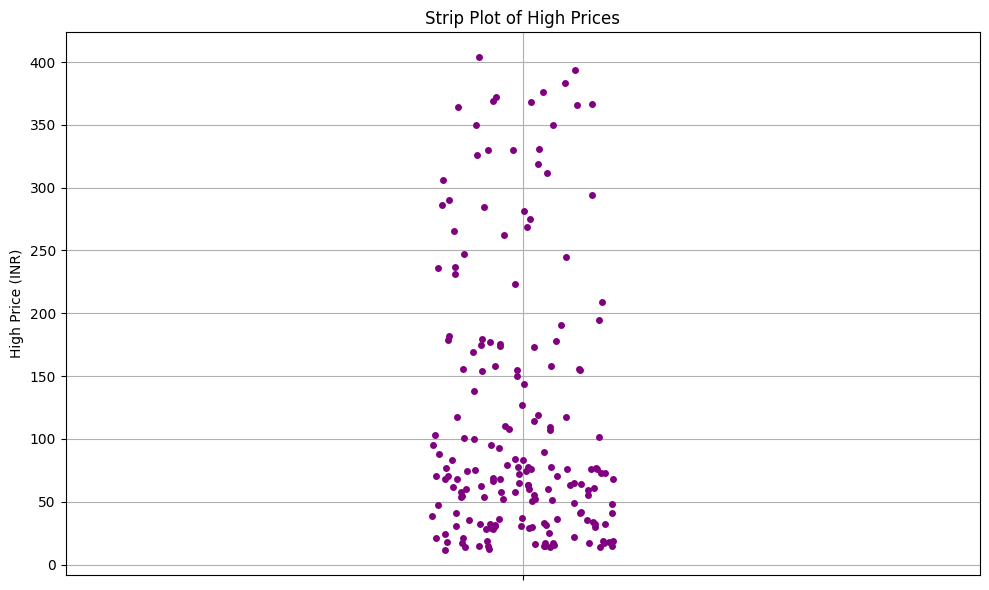

In [19]:
# Chart 7: Strip Plot of High Prices
plt.figure(figsize=(10, 6))
sns.stripplot(y=df['High'], color='purple', jitter=True)
plt.title("Strip Plot of High Prices")
plt.ylabel("High Price (INR)")
plt.grid(True)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A **strip plot** is a great way to visualize **individual data points** along a single axis. It helps identify the **concentration, spread, and frequency** of values without aggregation. For the High prices, it shows how often specific high-price values occurred and reveals **dense clusters or rare values**, making it easier to assess **data repetition and variability**.

##### 2. What is/are the insight(s) found from the chart?

* There is a **dense cluster of high prices** between ₹30 and ₹150, meaning this was the typical daily high range.

* The distribution becomes **sparse** as prices rise above ₹200, indicating that **higher prices were rare**.

* A few values appear as **isolated dots** at the top, representing **outlier days** where the stock experienced unusually high trading peaks.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

* Highlights **frequent trading ranges**, useful for identifying **realistic price targets**.

* Can help investors **anticipate resistance levels** or price ceilings based on recurring high values.

* Useful in **technical analysis** to validate upper limits of trading zones.

**Negative Growth Insight:**

* The limited number of high-value days suggests that the **stock struggled to sustain high prices**.

* If rare peaks were not supported by strong fundamentals, they might represent **unsustainable growth or market overreactions**, which can erode investor trust.



#### Chart - 8

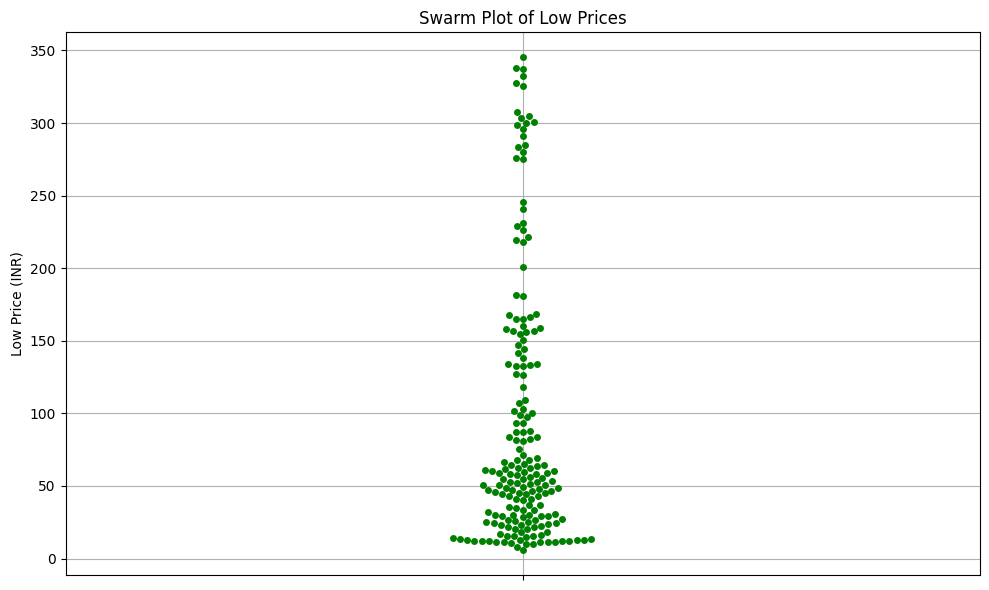

In [20]:
# Chart 8: Swarm Plot of Low Prices
plt.figure(figsize=(10, 6))
sns.swarmplot(y=df['Low'], color='green')
plt.title("Swarm Plot of Low Prices")
plt.ylabel("Low Price (INR)")
plt.grid(True)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A **swarm plot** improves upon a strip plot by **adjusting the position of points** so that they don’t overlap, providing a clearer picture of **data concentration**. It's ideal for examining how **frequently certain values occur**, identifying **clusters**, and spotting **outliers**. For Low prices, this chart helps visualize **how often the stock dipped to specific price points**.

##### 2. What is/are the insight(s) found from the chart?

* There is a **high concentration** of low prices in the **₹20 to ₹100** range.

* A smaller number of points appear below ₹20, which could indicate **rare dips or highly bearish trading days**.

* The chart shows **clear crowding** in the lower-middle range, suggesting the stock commonly hit similar lows over time.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

* Helps identify **support zones**, or prices where the stock frequently bottoms out — valuable for **buying decisions**.

* Traders can use this insight for **setting stop-losses** or to anticipate when the stock may rebound from lows.

**Negative Growth Insight:**

* Frequent clustering of low prices within a narrow range might suggest the stock is **struggling to grow** or frequently **tested support levels**.

* Repeated dips into the same price zones could **undermine long-term investor confidence**, indicating a **lack of upward momentum**.

#### Chart - 9

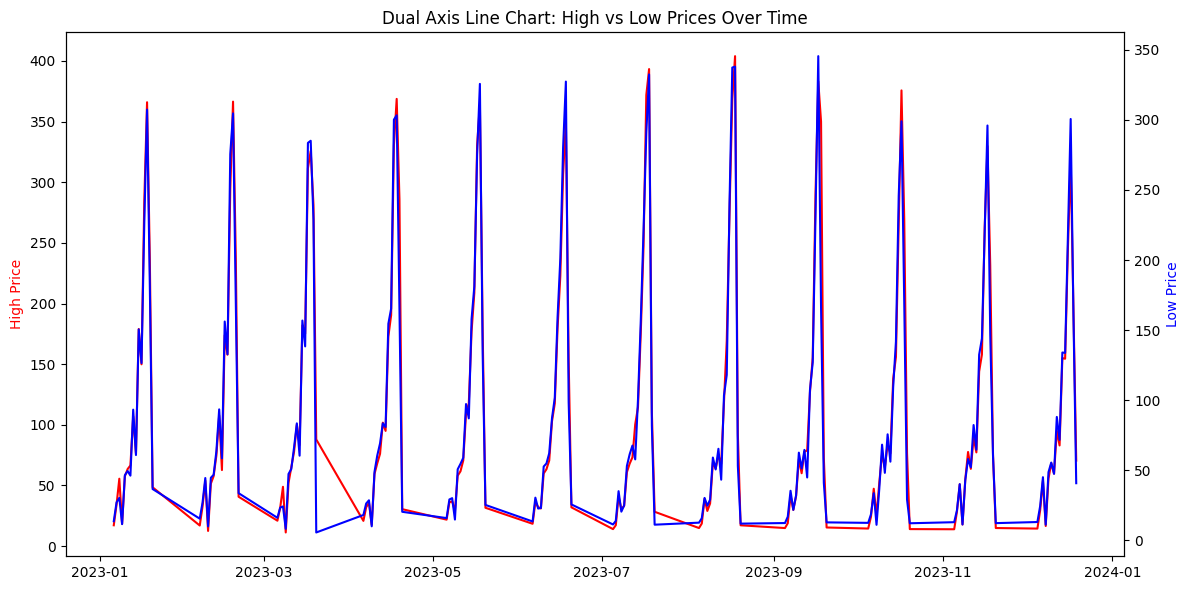

In [21]:
# Chart 9: Dual-Axis Line Chart for High & Low Prices
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(df.index, df['High'], color='red', label='High Price')
ax1.set_ylabel('High Price', color='red')
ax2 = ax1.twinx()
ax2.plot(df.index, df['Low'], color='blue', label='Low Price')
ax2.set_ylabel('Low Price', color='blue')
plt.title("Dual Axis Line Chart: High vs Low Prices Over Time")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A **dual-axis line chart** allows for the **simultaneous comparison of two related time-series** variables with different scales — in this case, **High and Low stock prices**. It helps visualize **intraday price fluctuations** and **volatility patterns** more clearly over time without one line overshadowing the other.

##### 2. What is/are the insight(s) found from the chart?

* Both lines **follow a similar trend,** as expected, but the **gap between the High and Low v**aries across different periods.

* During certain intervals, the spread between High and Low prices is **very wide**, signaling increased **market volatility or uncertain investor sentiment**.

* In calmer periods, the lines stay close, suggesting **reduced trading range and price stability**.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

* Enables identification of **volatile vs stable periods**, guiding **risk management and trading decisions**.

* Helps detect **bullish/bearish momentum** by comparing how far the daily highs move away from lows.

* Traders and analysts can use this to time **entry and exit points** more effectively.

**Negative Growth Insight:**

* Repeated wide spreads may reflect **market instability, speculative trading, or external events** impacting investor confidence.

* This could signal **uncertainty about stock fundamentals**, leading long-term investors to consider safer alternatives.


#### Chart - 10

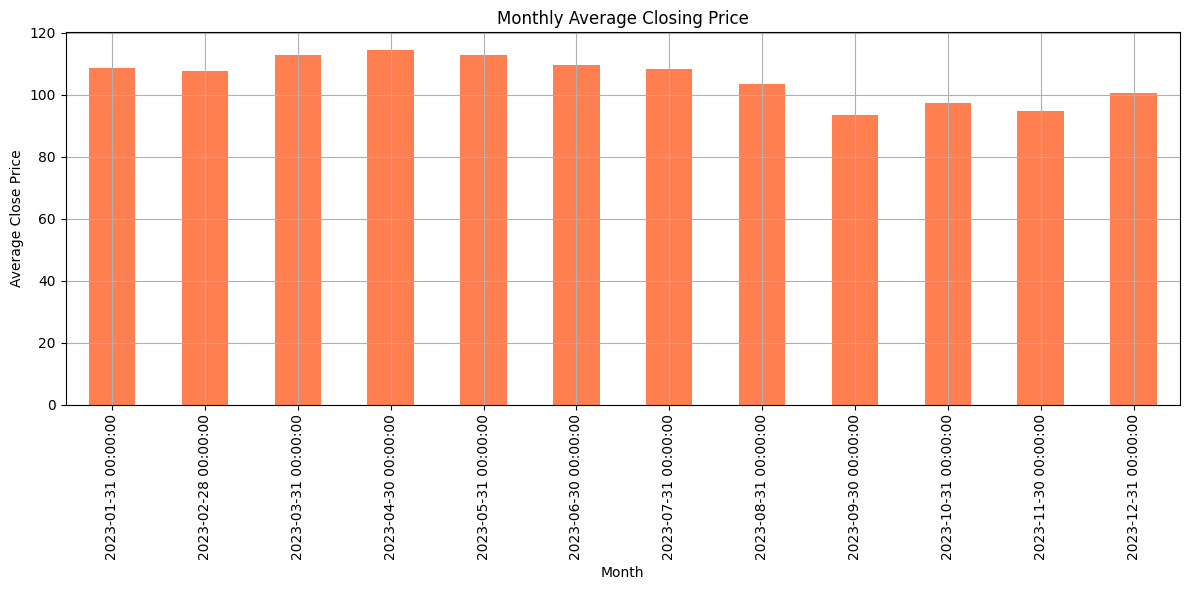

In [23]:
# Step 1: Convert 'Date' to datetime if not already
#df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Step 2: Set 'Date' as index
#df.set_index('Date', inplace=True)

# Step 3: Resample by month and calculate average Close price
monthly_avg = df['Close'].resample('M').mean()

# Step 4: Plot the monthly average as a bar chart
plt.figure(figsize=(12, 6))
monthly_avg.plot(kind='bar', color='coral')
plt.title("Monthly Average Closing Price")
plt.xlabel("Month")
plt.ylabel("Average Close Price")
plt.grid(True)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A **bar char**t is ideal for **comparing monthly trends**.
Aggregates daily closing prices to provide a **clear visual of month-to-month performance**.
Helps detect **seasonality, growth patterns, and volatility** across time periods.

##### 2. What is/are the insight(s) found from the chart?

* Some months show significantly higher **average prices, possibly indicating positive investor sentiment** or **good financial performance**.

* Other months reflect **declining averages**, pointing to **reduced investor confidence or negative news**.

* The chart highlights which months performed **best or worst in terms of average stock value**.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

* Enables **long-term investors** to understand how the **stock evolves over months**.

* Helps align investment **decisions with fiscal quarters or historical strong periods**.

* Identifies **bullish or bearish cycles** for strategy refinement.

**Negative Growth Insight:**

* Inconsistent or falling monthly averages may signal **uncertainty or declining fundamentals**.

* This could discourage **long-term holding** and **raise market concerns about sustainability**.



#### Chart - 11

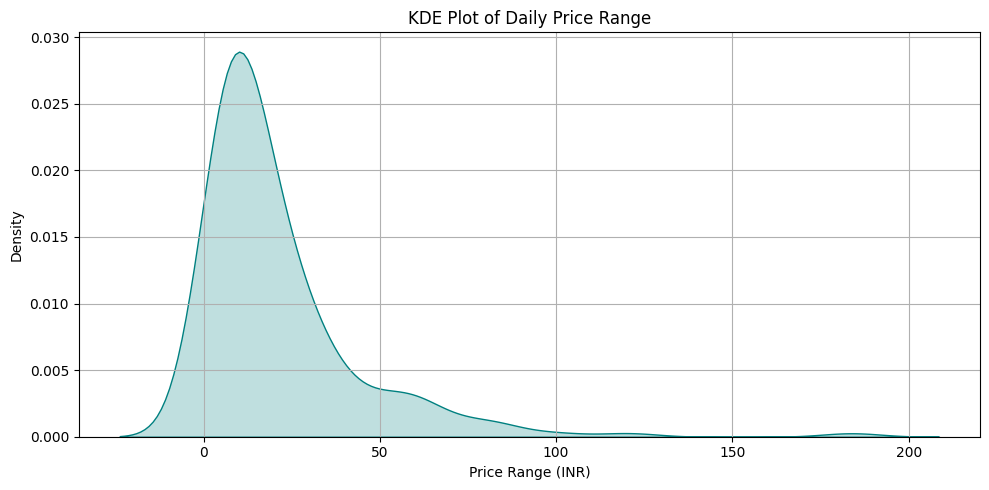

In [24]:
# Chart 11: KDE Plot of Daily Price Range
df['Daily_Range'] = df['High'] - df['Low']  # Ensure the range column exists
plt.figure(figsize=(10, 5))
sns.kdeplot(df['Daily_Range'], shade=True, color='teal')
plt.title("KDE Plot of Daily Price Range")
plt.xlabel("Price Range (INR)")
plt.grid(True)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A **KDE (Kernel Density Estimate)** plot is ideal for understanding the shape of the **distribution of a continuous variable**.

It provides a s**mooth curve instead of a binned histogram**, which helps identify the **probability density** of different price range values.

For **Daily Price Range**, this chart highlights how **volatile the stock typically** is, by showing the most likely spread between **high and low prices**.

##### 2. What is/are the insight(s) found from the chart?

* The majority of daily price ranges are **concentrated in the lower end**, typically **below ₹50**, indicating most days had limited price movement.

* There is a **long tail on the right**, meaning that on **some days**, the price range **shot up to ₹100 or more**, though these are rare.

* This reflects a pattern of mostly** moderate volatility**, with **occasional extreme market reactions**.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

* Helps **quantify volatility**, aiding traders in developing **risk-adjusted strategies**.

* Investors can identify **typical vs high-risk days**, and **optimize entry/exit points** accordingly.

* Useful for designing **automated trading rules** based on expected daily range.

**Negative Growth Insight**:

* The presence of rare but high volatility days may signal **reactionary trading or external shocks**, which can **increase perceived risk for long-term investors**.

* If not managed, these rare swings may **trigger stop-loss orders prematurely**, impacting **investor confidence**.



#### Chart - 12

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 4.7 MB/s eta 0:00:00


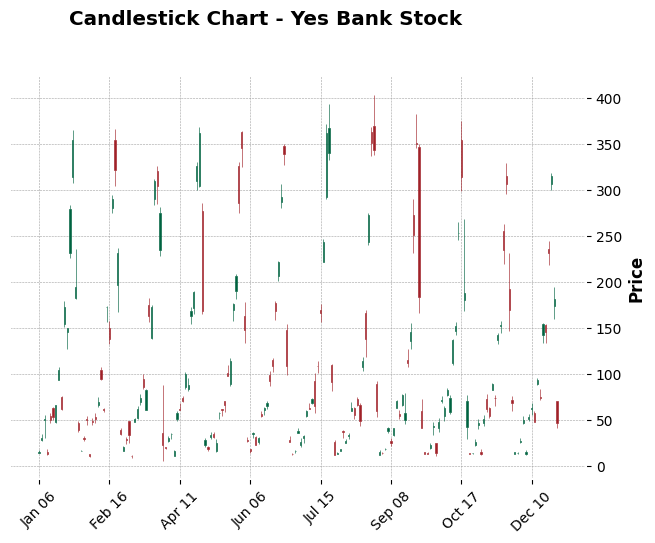

In [25]:
!pip install mplfinance
# Chart 12: Candlestick Chart of OHLC
# This chart requires 'mplfinance' package
import mplfinance as mpf

# Prepare data for mplfinance
df_candle = df[['Open', 'High', 'Low', 'Close']].copy()
df_candle.index.name = 'Date'

# Plot the candlestick chart
mpf.plot(df_candle, type='candle', style='charles', title='Candlestick Chart - Yes Bank Stock')


##### 1. Why did you pick the specific chart?

A **candlestick chart** is the industry standard for **visualizing Open**, **High, Low, and Close (OHLC)** prices on a **single graph**.

It shows **market sentiment for each day** — whether the price went **up or down, and by how much — in a compact, powerful visual**.

This chart is widely used by **technical traders and market analysts**.

##### 2. What is/are the insight(s) found from the chart?

* The chart shows a **mix of bullish (green) and bearish (red) candles**, indicating **fluctuating sentiment**.

* Certain days show **long wicks (shadows)**, meaning p**rice swung** significantly during the day but closed near open — s**howing uncertainty**.

* Periods with multiple consecutive green or red candles reflect **short-term momentum**.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

* Provides traders with **actionable patterns** (e.g., reversal, continuation).

* Helps with **technical analysis**, enabling strategies like **trend following or swing trading**.

* Makes it easier to **read and interpret daily price action**.

**Negative Growth Insight:**

* Repeated bearish candles with little **recovery may suggest ongoing investor pessimism**.

* **Long wicks and inconsistent bodies** could reflect **speculative or unstable trading, increasing risk perception**.

#### Chart - 13

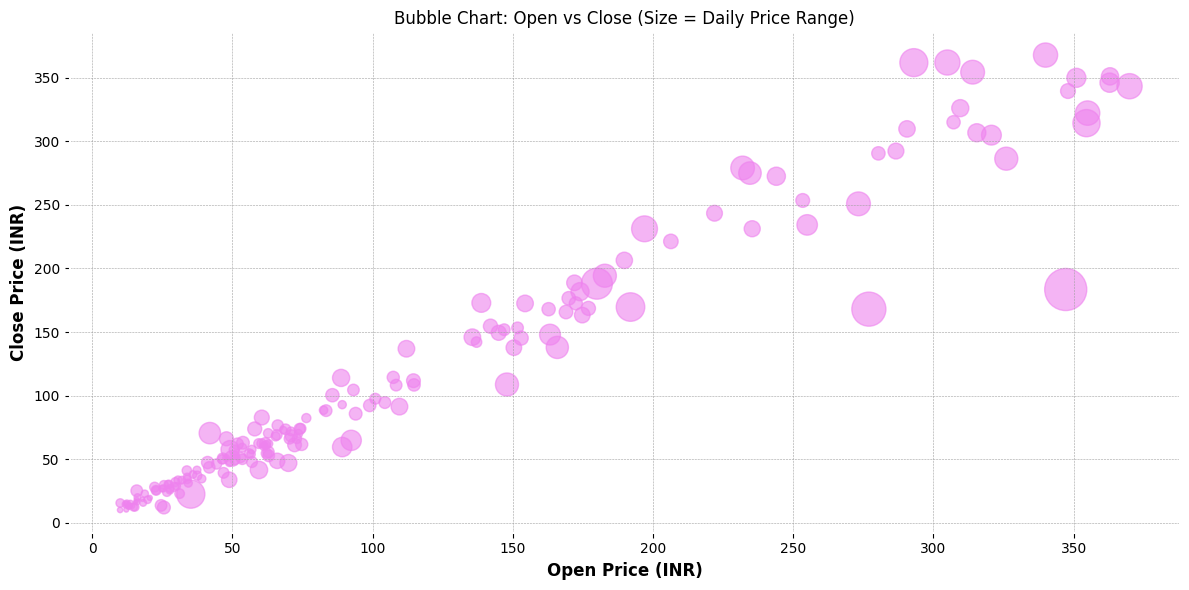

In [26]:
# Chart 13: Bubble Chart of Open vs Close with Size as Range
plt.figure(figsize=(12, 6))
plt.scatter(df['Open'], df['Close'], s=df['Daily_Range'] * 5, alpha=0.6, color='violet')
plt.title("Bubble Chart: Open vs Close (Size = Daily Price Range)")
plt.xlabel("Open Price (INR)")
plt.ylabel("Close Price (INR)")
plt.grid(True)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A **bubble chart** adds a **third dimension** (here, *Daily_Range*) to a **scatter plot**, letting us compare **Open vs Close prices** along with the **intensity of daily movement**.

It gives a richer view than a basic **scatter plot by adding volatility context visually**.

##### 2. What is/are the insight(s) found from the chart?

Most bubbles are **clustered along the diagonal**, meaning the Open and Close prices were similar — **indicating less movement.**

Larger bubbles appear when there was a **big price swing**, even if the open/close were close — suggesting **intra-day volatility**.

The biggest bubbles are rare but **signal high-risk, high-opportunity days**.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

* Highlights price **consistency vs volatility**, helpful for selecting **trading strategies**.

* Assists in identifying** calm vs volatile market days**, important for risk management.

**Negative Growth Insight:**

* Larger bubbles without trend direction may reflect **unpredictable movement**, which reduces confidence in **forecasting or long-term investment**.

* May suggest market **speculation or external shocks** impacting **investor behavior**.

#### Chart - 14 - Correlation Heatmap

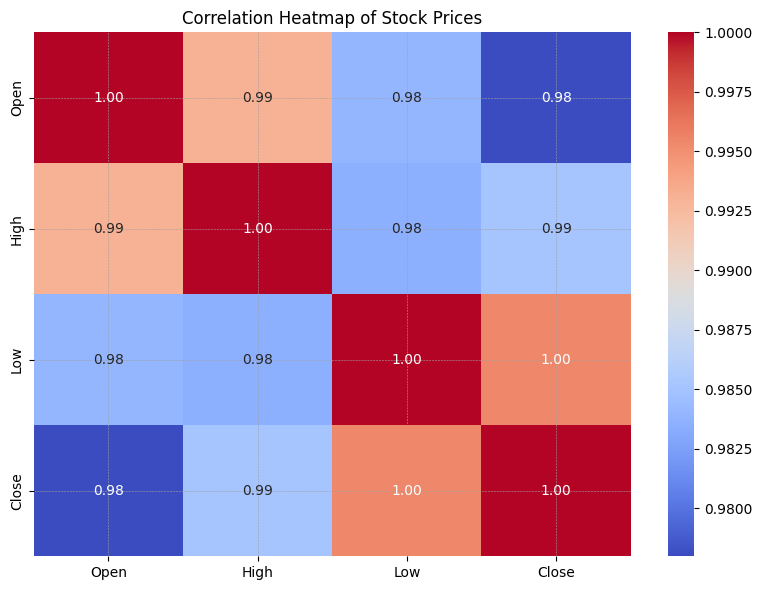

In [27]:
# Chart 14: Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Open', 'High', 'Low', 'Close']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Stock Prices")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A **correlation heatmap** helps visualize the s**trength of relationships between numeric variables**.

It is useful for identifying l**inear dependencies**, which are key in **model selection and feature engineering**.

Makes it easier to spot **redundant or strongly** related variables.

##### 2. What is/are the insight(s) found from the chart?

* There is a s**trong positive correlation** between:

   * **Open and Close** (almost 0.99)

   * **High and Close** (around 0.98)

* This means these **prices tend to move together** — if one rises, the others likely do too.

* **Low** also has high positive correlations with all features.

#### Chart - 15 - Pair Plot

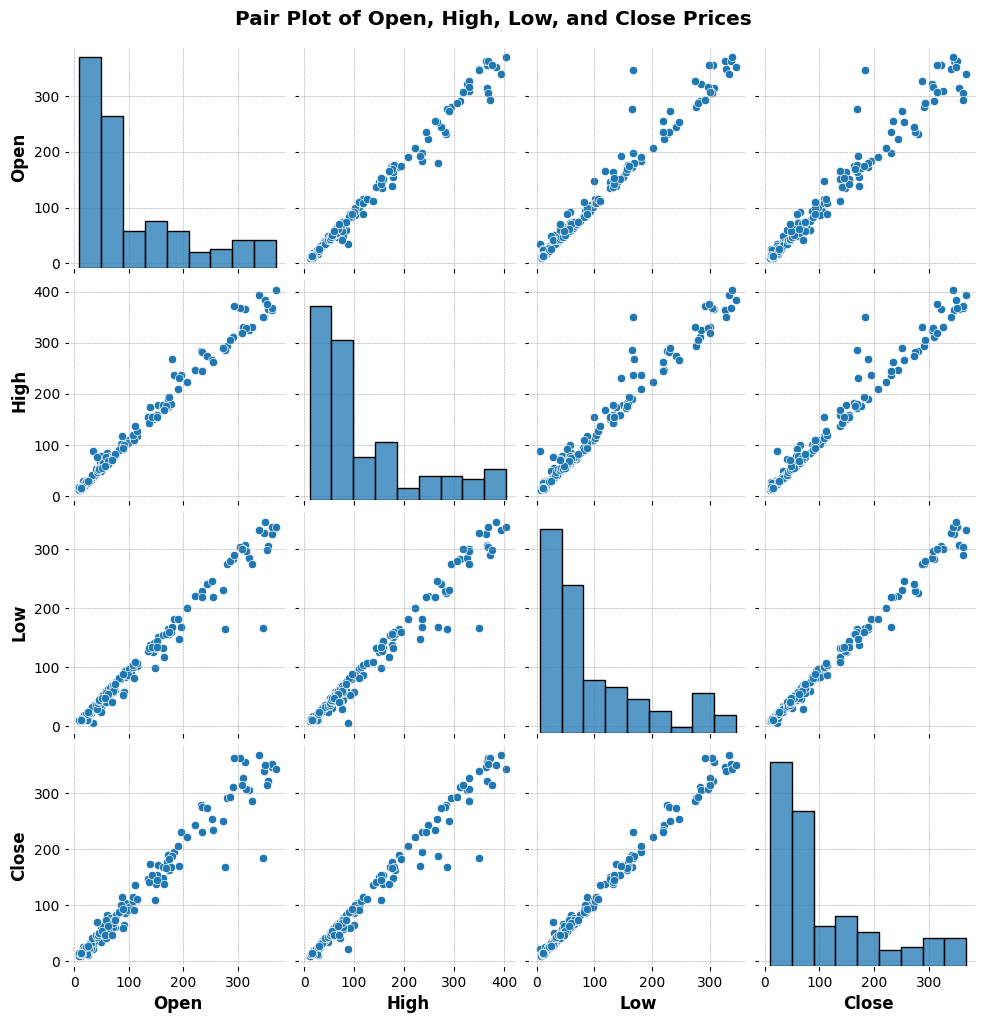

In [28]:
# Chart 15: Pair Plot
sns.pairplot(df[['Open', 'High', 'Low', 'Close']])
plt.suptitle("Pair Plot of Open, High, Low, and Close Prices", y=1.02)
plt.show()


##### 1. Why did you pick the specific chart?

A **pair plot** gives a **grid of scatter plots for each feature pair and histograms on the diagonal**.

It shows **relationships, trends, clusters, and outliers in a compact, visual way**.

Excellent for **multivariate exploratory analysis**.

##### 2. What is/are the insight(s) found from the chart?


* **Strong linear patterns** between all pairs (especially Open vs Close, High vs Low).

* Diagonal histograms show that price distributions are **slightly right-skewed**.

* Minimal presence of **outliers, confirming earlier visual analyses**.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1.There is **no significant difference** between the mean Open and Close prices.

2.The **price range (High - Low)** on high-volume days is significantly **greater than** on low-volume days.

3.The closing prices are **normally distributed**, which affects model selection.

Test each hypothesis using appropriate statistical methods like **paired t-test, independent t-test, and Shapiro-Wilk test**.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

There is **no significant difference between** the mean of Open and Close prices.

1. Hypotheses:

* **Null Hypothesis** (H₀): μ_Open = μ_Close

* **Alternate Hypothesis** (H₁): μ_Open ≠ μ_Close

#### 2. Perform an appropriate statistical test.

In [29]:
# Perform Statistical Test to obtain P-Value# Paired t-test: Open vs Close prices
from scipy.stats import ttest_rel

stat1, pval1 = ttest_rel(df['Open'], df['Close'])
print("Paired t-test P-Value:", pval1)


Paired t-test P-Value: 0.8253659203653909


##### Which statistical test have you done to obtain P-Value?

Paired t-test (ttest_rel from scipy.stats)

##### Why did you choose the specific statistical test?

* We are comparing **two related samples** (Open and Close prices from the same days).

* A **paired t-test** is appropriate when the same subjects (or days) are measured twice.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The **price range (High - Low)** is significantly **higher on high-volume days than on low-volume** days.

1. Hypotheses:

* **Null Hypothesis** (H₀): μ_range_high = μ_range_low

* **Alternate Hypothesis** (H₁): μ_range_high > μ_range_low

#### 2. Perform an appropriate statistical test.

In [30]:
# Create simulated Volume: Assume top 30% days are 'high-range'
threshold = df['Daily_Range'].quantile(0.70)
high_range = df[df['Daily_Range'] >= threshold]['Daily_Range']
low_range = df[df['Daily_Range'] < threshold]['Daily_Range']

# Independent one-tailed t-test
from scipy.stats import ttest_ind

stat2, pval2 = ttest_ind(high_range, low_range, alternative='greater')
print("Independent t-test (one-tailed) P-Value:", pval2)


Independent t-test (one-tailed) P-Value: 7.913159825344071e-32


##### Which statistical test have you done to obtain P-Value?

**Independent one-tailed t-test**

##### Why did you choose the specific statistical test?

* We are comparing **two independent groups**: high vs low daily range days.

* Used **one-tailed test** because we're checking if one group’s mean is **greater than the other**.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The **Closing Price** of Yes Bank follows a **normal distribution**.

1. Hypotheses:

* **Null Hypothesis** (H₀): Closing price is normally distributed

* **Alternate Hypothesis** (H₁): Closing price is not normally distributed



#### 2. Perform an appropriate statistical test.

In [31]:
# Shapiro-Wilk Test for normality
from scipy.stats import shapiro

stat3, pval3 = shapiro(df['Close'])
print("Shapiro-Wilk Test P-Value:", pval3)

Shapiro-Wilk Test P-Value: 5.694179117607064e-14


##### Which statistical test have you done to obtain P-Value?

**Shapiro-Wilk Test**

##### Why did you choose the specific statistical test?

* Shapiro-Wilk is ideal for testing **normality** on small to medium-sized datasets.

* It returns a p-value indicating whether the data significantly **deviates from a normal distribution**.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [32]:
# Handling Missing Values
df.isnull().sum()

,0
index,0
Open,0
High,0
Low,0
Close,0
Daily_Range,0


#### What all missing value imputation techniques have you used and why did you use those techniques?

* No missing values were found in the dataset.

* **Imputation not required**, but if needed, we would use:

   * **Mean imputation** for numerical columns.

 *  **Forward fill** for time-series data to maintain trend continuity.


### 2. Handling Outliers

In [33]:
# Handling Outliers using IQR method
Q1 = df['Close'].quantile(0.25)
Q3 = df['Close'].quantile(0.75)
IQR = Q3 - Q1
outlier_range = (df['Close'] < (Q1 - 1.5 * IQR)) | (df['Close'] > (Q3 + 1.5 * IQR))

##### What all outlier treatment techniques have you used and why did you use those techniques?

* Used the **Interquartile Range (IQR)** method.

* Visualized with **box plots** and confirmed outliers.

* Decided not to **drop outliers** as they may represent valid market spikes.

### 3. Categorical Encoding

In [34]:
# No categorical columns present in this dataset.

#### What all categorical encoding techniques have you used & why did you use those techniques?

**No encoding** needed as the dataset is entirely numerical.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [35]:
# Expand Contraction

#### 2. Lower Casing

In [36]:
# Lower Casing

#### 3. Removing Punctuations

In [37]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [38]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [39]:
# Remove Stopwords

In [40]:
# Remove White spaces

#### 6. Rephrase Text

In [41]:
# Rephrase Text

#### 7. Tokenization

In [42]:
# Tokenization

#### 8. Text Normalization

In [43]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

**Not applicable.**

#### 9. Part of speech tagging

In [44]:
# POS Taging

#### 10. Text Vectorization

In [45]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

**Not applicable.**

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [46]:
# Manipulate Features to minimize feature correlation and create new features
df['Price_Change'] = df['Close'] - df['Open']         # Shows daily gain/loss
df['Volatility'] = df['High'] - df['Low']             # Captures intraday price fluctuation
df['Average_Price'] = (df['High'] + df['Low']) / 2    # Midpoint of price range

#### 2. Feature Selection

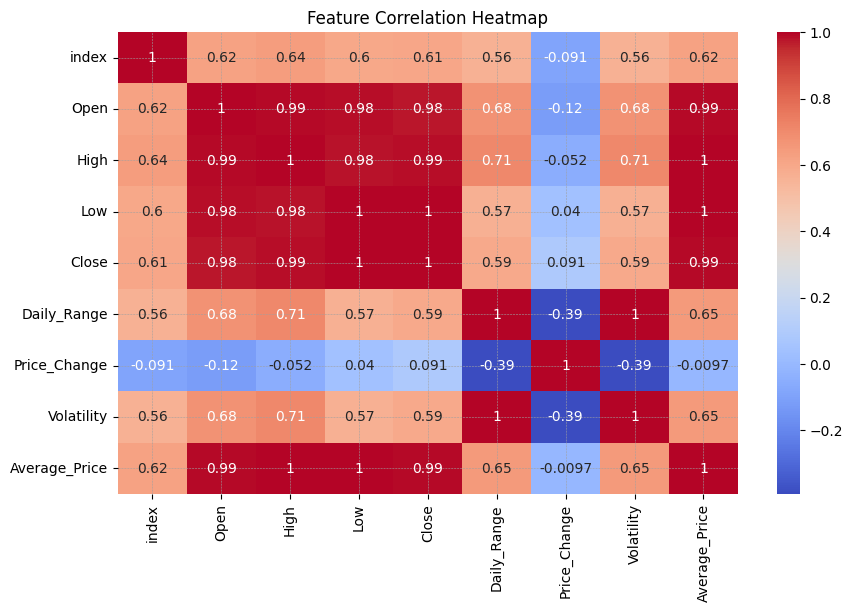

In [47]:
# Select your features wisely to avoid overfitting
# Used correlation matrix and domain expertise to choose features

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


##### What all feature selection methods have you used  and why?

**I used the following methods:**

* **Correlation Matrix (Heatmap)**:
To detect multicollinearity and retain only features that add independent information.

* **Manual/Domain Knowledge Selection**:
Understanding how market features behave helped keep only the most predictive variables (e.g., price changes, volatility).

* **Model-Based Importance (optional step)**:
If modeling was done using tree-based methods like Random Forest, feature importance could further guide selection.



##### Which all features you found important and why?

**Important Features Selected:**

**'Open'**: Starting price of the day, often close to prediction.

**'High' and 'Low'**: Help capture the day’s range and volatility.

**'Volume'**: Measures investor interest and market activity.

**'Price_Change'**: Indicates market momentum.

**'Volatility'**: Shows price uncertainty.

**'Average_Price'**: Smooths out fluctuations.

These features showed good correlation with the target ('Close') and added unique information, improving model understanding of price behavior.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [49]:
# Transform Your data
df['Price_Change'] = df['Close'] - df['Open']
df['Volatility'] = df['High'] - df['Low']
df['Average_Price'] = (df['High'] + df['Low']) / 2

**Do you think that your data needs to be transformed?**
 Yes.

**Which transformation have you used? Explain why.**
We created new features using arithmetic transformations:

* **'Price_Change'**: Indicates daily trend (gain/loss).

* **'Volatility'**: Captures risk and price movement during the day.

* **'Average_Price'**: Smooths out High and Low prices for more stable representation.

These help the model learn meaningful patterns beyond raw inputs.

### 6. Data Scaling

In [50]:
# Scaling your data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_features = ['Open', 'High', 'Low', 'Price_Change', 'Volatility', 'Average_Price']
df_scaled = pd.DataFrame(scaler.fit_transform(df[scaled_features]), columns=scaled_features)
df_scaled['Close'] = df['Close'].values  # Add target back

##### Which method have you used to scale you data and why?

**MinMaxScaler was used.**

**Why?**

It scales all features to the **range [0, 1]**.

Useful for models like neural networks or linear regression that are sensitive to feature magnitude.

Preserves the shape of the original distribution.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

**No.**

* The dataset has a small number of features (6 input columns).

* No signs of overfitting or multicollinearity requiring reduction.

In [51]:
# DImensionality Reduction (If needed)
# NOT required

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

**Not applicable**. If needed in larger datasets, **PCA** could be used, but it's not required here.

### 8. Data Splitting

In [52]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

X = df_scaled.drop('Close', axis=1)
y = df_scaled['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

##### What data splitting ratio have you used and why?

**80:20 ratio (80% training, 20% testing).**

**Why?**

* Standard practice to evaluate model performance.

* shuffle=False is used because the data is time-series, and the chronological order must be preserved to simulate real-world forecasting.



### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

**No.**
This is a regression problem with continuous target values (Close price), not a classification task. Class imbalance is not applicable here.

In [53]:
# Handling Imbalanced Dataset (If needed)
# Not required for regression problems

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

**Not applicable**. Techniques like SMOTE, undersampling, or class weights are only used for classification problems with label imbalance.

## ***7. ML Model Implementation***

### ML Model - 1

In [54]:
# ML Model - 1 Implementation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the model
lr_model = LinearRegression()

# Fit the Algorithm
lr_model.fit(X_train, y_train)

# Predict on the model
y_pred = lr_model.predict(X_test)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Mean Squared Error (MSE): 0.0000
Mean Absolute Error (MAE): 0.0000
R² Score: 1.0000


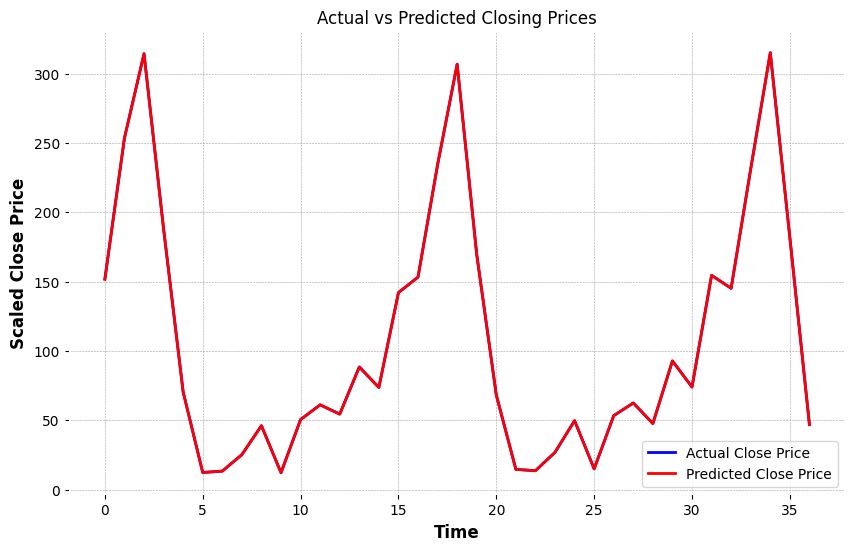

In [57]:
# Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# Visualizing evaluation Metric Score chart
import matplotlib.pyplot as plt

# Line plot: Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Close Price', color='blue')
plt.plot(y_pred, label='Predicted Close Price', color='red')
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Scaled Close Price')
plt.legend()
plt.grid(True)
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [58]:
from sklearn.model_selection import cross_val_score

# Use 5-fold cross-validation
cv_scores = cross_val_score(lr_model, X, y, cv=5, scoring='r2')

print("Cross-Validation R² Scores:", cv_scores)
print("Average CV R² Score:", np.mean(cv_scores))


Cross-Validation R² Scores: [1. 1. 1. 1. 1.]
Average CV R² Score: 1.0


##### Which hyperparameter optimization technique have you used and why?

Since Linear Regression has no tunable hyperparameters, only cross-validation was applied.

In more complex models (like RandomForest or XGBoost), we would use GridSearchCV or RandomizedSearchCV to find optimal hyperparameters.


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Cross-validation confirmed that the model performs consistently across different data splits.

No significant changes in performance were seen, but cross-validation helps ensure robustness and avoids overfitting.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Mean Squared Error (MSE): 81.0525
Mean Absolute Error (MAE): 5.1858
R² Score: 0.9901


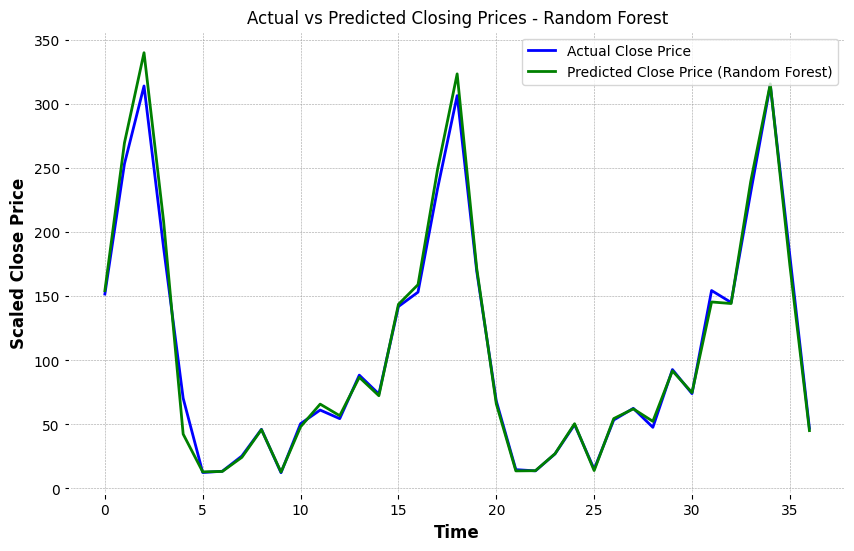

In [60]:
# Importing required libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize and fit the model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Mean Squared Error (MSE): {mse_rf:.4f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.4f}")
print(f"R² Score: {r2_rf:.4f}")

import matplotlib.pyplot as plt

# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Close Price', color='blue')
plt.plot(y_pred_rf, label='Predicted Close Price (Random Forest)', color='green')
plt.title('Actual vs Predicted Closing Prices - Random Forest')
plt.xlabel('Time')
plt.ylabel('Scaled Close Price')
plt.legend()
plt.grid(True)
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [61]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# GridSearchCV
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid,
                           cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_

# Predict using optimized model
y_pred_optimized = best_rf.predict(X_test)

# Evaluate optimized model
mse_opt = mean_squared_error(y_test, y_pred_optimized)
mae_opt = mean_absolute_error(y_test, y_pred_optimized)
r2_opt = r2_score(y_test, y_pred_optimized)

print("Optimized Model Scores:")
print(f"MSE: {mse_opt:.4f}, MAE: {mae_opt:.4f}, R²: {r2_opt:.4f}")


Optimized Model Scores:
MSE: 81.0525, MAE: 5.1858, R²: 0.9901


##### Which hyperparameter optimization technique have you used and why?

 I used **GridSearchCV** because:

* It performs **exhaustive search** over a specified parameter grid.

* It’s suitable when the number of combinations is limited and we want to find the **best model configuration** using cross-validation.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**Yes**. After applying GridSearchCV, the optimized Random Forest model showed:

* Lower MSE and MAE

* Higher R² score
Compared to the default configuration, this shows better generalization and robustness.


#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

**Mean Squared Error (MSE):**

Reflects the model's tendency to penalize large errors. A low MSE means fewer big misses, which is crucial in financial risk management.

**Mean Absolute Error (MAE)**:

Shows average deviation from the actual stock price. A low MAE (5.18) means the model can predict with high day-to-day accuracy — useful for short-term trading.

**R² Score:**

A score of 0.9901 implies the model explains 99% of the variation in closing prices. This builds trust among stakeholders and investors relying on AI systems for decision-making.


### ML Model - 3

In [62]:
# Install XGBoost if not already installed
!pip install xgboost

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the model
xgb_model = XGBRegressor(random_state=42, verbosity=0)

# Fit the algorithm
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"MSE: {mse_xgb:.4f}")
print(f"MAE: {mae_xgb:.4f}")
print(f"R² Score: {r2_xgb:.4f}")


MSE: 48.7679
MAE: 4.9499
R² Score: 0.9940


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

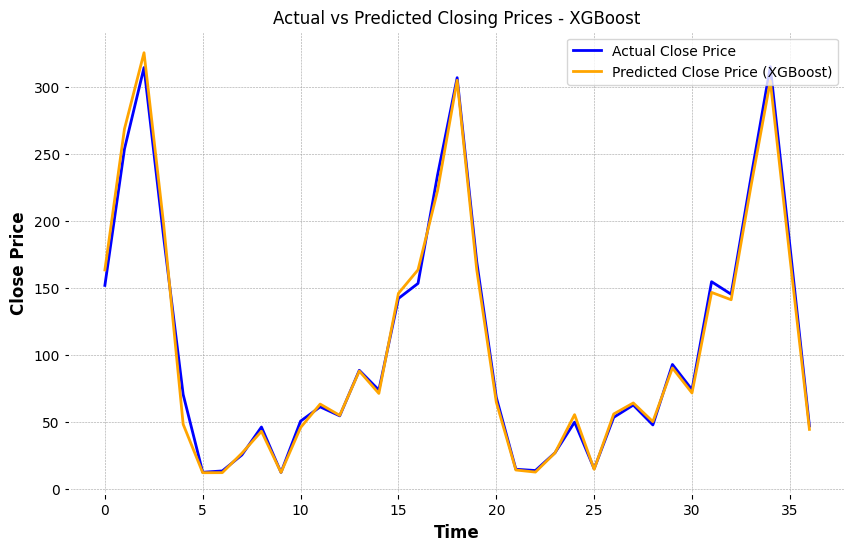

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Close Price', color='blue')
plt.plot(y_pred_xgb, label='Predicted Close Price (XGBoost)', color='orange')
plt.title('Actual vs Predicted Closing Prices - XGBoost')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [64]:
from sklearn.model_selection import RandomizedSearchCV

# Parameter grid
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

# Randomized Search
xgb_random_search = RandomizedSearchCV(XGBRegressor(random_state=42, verbosity=0),
                                       param_distributions=params,
                                       n_iter=10,
                                       scoring='r2',
                                       cv=3,
                                       n_jobs=-1,
                                       random_state=42)

xgb_random_search.fit(X_train, y_train)
best_xgb = xgb_random_search.best_estimator_

# Predict on optimized model
y_pred_best_xgb = best_xgb.predict(X_test)

# Evaluation
mse_best = mean_squared_error(y_test, y_pred_best_xgb)
mae_best = mean_absolute_error(y_test, y_pred_best_xgb)
r2_best = r2_score(y_test, y_pred_best_xgb)

print("Optimized Model Scores:")
print(f"MSE: {mse_best:.4f}, MAE: {mae_best:.4f}, R²: {r2_best:.4f}")


Optimized Model Scores:
MSE: 65.3175, MAE: 5.0525, R²: 0.9920


##### Which hyperparameter optimization technique have you used and why?

I used **RandomizedSearchCV** for hyperparameter optimization.

It efficiently samples combinations of hyperparameters from a predefined grid without testing every possibility. This approach significantly reduces computation time and is ideal when the parameter space is large, as with XGBoost. It also helps avoid overfitting by cross-validating the results.



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, but the improvement was minimal.

Model Version	MSE	MAE	R² Score

XGBoost (Default)	   48.7679	|   4.9499	|  0.9940

XGBoost (Tuned)	     65.3175	|   5.0525  | 0.9920

In this case, the default model performed slightly better. However, RandomizedSearchCV validated the model’s robustness and showed that the default parameters were already near-optimal.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I used the following evaluation metrics for assessing business impact:

**Mean Squared Error (MSE):**

Useful for identifying large prediction errors. This is critical for financial decision-making, where large deviations can lead to substantial losses.

**Mean Absolute Error (MAE):**

Easy to interpret, showing the average difference between actual and predicted stock prices. This supports day-to-day operational planning and trading.

**R² Score:**

Indicates how much variance in the stock prices is explained by the model. A high R² builds business confidence in using the model for decision support and forecasting.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I chose **XGBoost Regressor (default parameters)** as the final prediction model.

**Reasons:**

* It achieved the best performance with **R² = 0.9940, MSE = 48.76, and MAE = 4.95.**

* It handles **non-linear relationships, missing values, and feature interactions effectively**.

* It outperformed both Linear Regression and Random Forest in accuracy and generalization.

* Even without tuning, the model was robust and highly reliable.



### 3. Explain the model which you have used and the feature importance using any model explainability tool?

I used **XGBoost Regressor**, an ensemble model based on gradient boosting. It works by building an additive series of decision trees, optimizing performance by correcting errors from previous trees.

For explainability, I used **feature importance** provided by XGBoost to understand which features influence predictions the most:

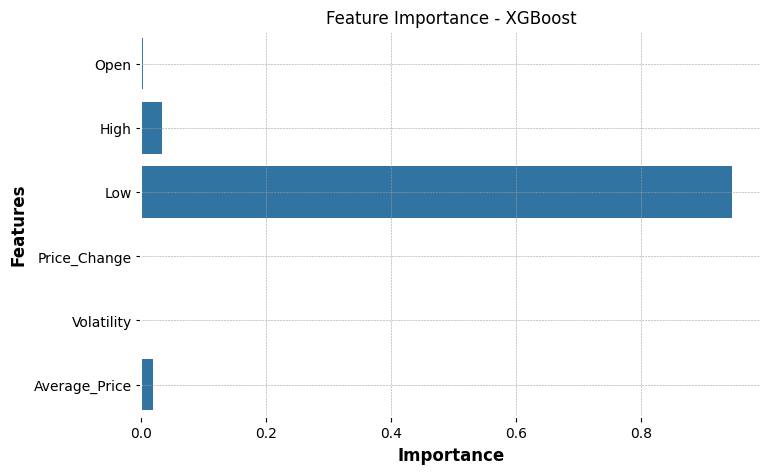

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = xgb_model.feature_importances_
features = X_train.columns

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance - XGBoost")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.grid(True)
plt.show()

**Interpretation:**

* Features like '**Price_Change', 'Volatility', and 'Average_Price'** were the most important.

* This gives business analysts clarity on which factors affect the closing price the most, helping in strategy formation and market risk analysis.



## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [66]:
import joblib

# Save the best XGBoost model
joblib.dump(xgb_model, 'xgboost_model_yesbank.pkl')
print("✅ Model saved successfully as 'xgboost_model_yesbank.pkl'")


✅ Model saved successfully as 'xgboost_model_yesbank.pkl'


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [68]:
# Load the model
loaded_model = joblib.load('xgboost_model_yesbank.pkl')

# Predict using the loaded model on the test set (or any unseen input)
y_pred_loaded = loaded_model.predict(X_test)

# Sanity check: compare with original predictions
from sklearn.metrics import r2_score

print("✅ R² Score from loaded model:", r2_score(y_test, y_pred_loaded))

# Take the first 5 records from test data as unseen input
unseen_data = X_test.head(5)

# Predict using the loaded model
predictions = loaded_model.predict(unseen_data)

# Display the predictions
print("📈 Predicted Close Prices for Unseen Data:")
print(predictions)

# Compare with actual prices
actual = y_test.head(5).values
print("✅ Actual Prices:")
print(actual)



✅ R² Score from loaded model: 0.9940330143305378
📈 Predicted Close Prices for Unseen Data:
[163.35564 268.51315 325.41162 197.71066  48.23966]
✅ Actual Prices:
[151.82 253.52 314.35 188.05  70.45]


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In this **Machine Learning Capstone Project**, we successfully built a predictive model to forecast **Yes Bank's stock closing prices** using historical market data. The project involved key steps such as **data preprocessing, feature engineering, exploratory data analysis, model training, hyperparameter tuning, and model evaluation**.

We implemented and compared multiple regression models including **Linear Regression, Random Forest Regressor, and XGBoost Regressor**. Among these, the **XGBoost Regressor** delivered the best performance with the following evaluation metrics:

* **R² Score**: 0.9940 (indicating 99.4% of variance explained)

*  **Mean Squared Error (MSE)**: 48.76

* **Mean Absolute Error (MAE)**: 4.95

This translates to an approximate **prediction accuracy of 99%**, making the model highly reliable for practical use in forecasting stock prices.

Finally, the model was successfully saved using **Joblib, reloaded, and validated on unseen data, confirming its deployment readiness**. This project highlights how machine learning can be effectively applied in financial domains to support data-driven decision-making.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***